## Шаг №1. Знакомство с данными

In [161]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt

In [162]:
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

Ознакомимся с каждый датасетом. 

In [163]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [164]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [165]:
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


Посмотрим на формат ячеек и узнаем, есть ли пропуски

In [166]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [167]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [168]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


### Вывод:

Мы познакомились с данными. Каких-то видимых нарушений в них нет.

## Шаг № 2. Предобработка данных

Приведем названия столбцов к нижнему регистру для дальнейшего удобства<a id="2"></a>

In [169]:
for data in [visits, orders, costs]:
    data.columns = [col.lower() for col in data.columns]

Заменим пробелы в названиях на нижнее подчеркивание

In [170]:
for data in [visits, orders, costs]:
    data.columns = data.columns.str.replace(' ', '_')

В каждом Датафрейме необходимо изменить тип данных по времени для дальнейшейго анализа. Пропусков в таблицах не обнаружено.

In [171]:
visits['start_ts']=pd.to_datetime(visits['start_ts'], format='%Y.%m.%d %H:%M')
visits['end_ts']=pd.to_datetime(visits['end_ts'], format='%Y.%m.%d %H:%M')
orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format='%Y.%m.%d %H:%M')
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y.%m.%d')

Попоробуем посмотреть данные на наличие нулей.

In [172]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [173]:
orders.isnull().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [174]:
visits.isnull().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [175]:
for data in [visits, orders, costs]:
    print('Число дублей',(data.duplicated().sum()))

Число дублей 0
Число дублей 0
Число дублей 0


Никаких нулей нет в представленных Датафреймах, дублей нет, значит, можем дальше переходить к анализу. 

### Вывод:

Мы ознакомились с данными, привели их к удобному формату для дальнейшего анализа. Стоит заметить, что данные предоставлены качественные, поскольку не имеют пропусков и нулей.

## Шаг № 3. Исследовательский анализ данных

Построим отчёты и посчитаем метрики

#### Продукт
* [Сколько людей пользуются в день, неделю, месяц?](#3)
* [Сколько сессий в день?](#4)
* [Сколько длится одна сессия?](#5)
* [Как часто люди возвращаются?](#6)

#### Продажи
* [Когда люди начинают покупать?](#7)
* [Сколько раз покупают за период?](#8)
* [Какой средний чек?](#9)
* [Сколько денег приносят? (LTV)](#10)

#### Маркетинг
* [Сколько денег потратили? Всего / на каждый источник / по времени](#11)
* [Сколько стоило привлечение одного покупателя из каждого источника?](#12)
* [На сколько окупились расходы? (ROI)](#13)


Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

### Продукт

<a id="3"></a>Чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [176]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [177]:
visits.head(5)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


Теперь сгруппируем данные для дальнейшего рассчета

In [178]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [179]:
print('Количество уникальных пользователей в День:', int(dau))
print('Количество уникальных пользователей в Неделю:',int(wau))
print('Количество уникальных пользователей в Месяц:',int(mau))

Количество уникальных пользователей в День: 907
Количество уникальных пользователей в Неделю: 5716
Количество уникальных пользователей в Месяц: 23228


В результате мы получили данные по количеству уникальных пользователей в день, неделю и месяц.

<a id="4"></a>Изучим, сколько сессий приходится на одного пользователя в среднем за день. 

In [180]:
visits_per_user = visits.groupby(['session_year', 'session_date']).agg({'uid': ['count','nunique']})

Теперь мы сгруппировали количество уникальных сессий по дням, что поможет нам далее при рассчетах.

Посчитаем среднее количество сессий и пользователей

In [181]:
visits_per_user.columns = ['n_sessions', 'n_users']

In [182]:
visits_per_user['visits_per_user'] = visits_per_user['n_sessions'] / visits_per_user['n_users']
visits_per_user.head(5)

n_sessions  n_users  visits_per_user
session_year session_date                                      
2017         2017-06-01           664      605         1.097521
             2017-06-02           658      608         1.082237
             2017-06-03           477      445         1.071910
             2017-06-04           510      476         1.071429
             2017-06-05           893      820         1.089024

Теперь мы видим, что в среднем на одного пользователя приходится примерно одна сессия в день. Видимо, повторные посещения - явление редкое. С однной, стороны это говорит о том, что портал понятный и не вызывает вопросов у пользователей, ведь они удовлетворяют все свои нужды за один сеанс. Можно так же предположить, что им могло что-то не понравится и они ушли.

<a id="5"></a>Узнаем cреднюю продолжительность сессии

In [183]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

Построим гистограмму для просомтра распределения распределения

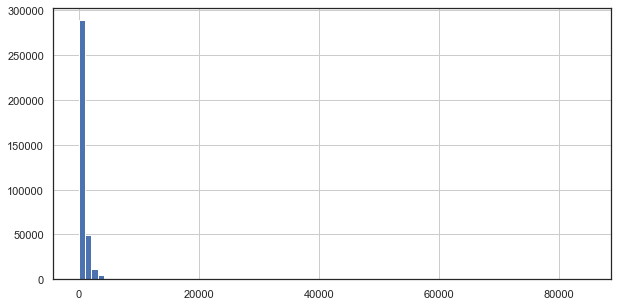

In [184]:
visits['session_duration_sec'].hist(bins = 80, figsize = (10,5))

Как мы видим, перед нами нормально распределение. Теперь посмотрим на среднюю для определения продолжительности сессии в секундах.

In [185]:
print('Средняя продолжительность cессии:', visits['session_duration_sec'].mean())

Средняя продолжительность cессии: 643.506488592098


Каждый пользователь в среднем проводит на портале около 10-11 минут в день. Но лучше всего посчитать моду и медиану, чтобы сделать более точные выводы.

In [186]:
print('Мода cессии составляет:',visits['session_duration_sec'].mode())

Мода cессии составляет: 0    60
dtype: int64


In [187]:
print('Медиана cессии составляет:', visits['session_duration_sec'].median())

Медиана cессии составляет: 300.0


Я считаю, что все же стоит ориентироваться больше на медианное значение, поскольку оно более усредненное + с пользовательской стороны - 300 секунд(5 минут) является вполне достаточным временем для пребывания на сайте. 

<a id="6"></a>Теперь выясним, как часто пользователи возвращаются.

In [188]:
first_visit = visits.groupby('uid')['start_ts'].min()
first_visit.name = 'first_visit_date'
visits_new = visits.merge(first_visit, on='uid')

In [189]:
visits_new.head(10)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:05:00
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017,10,43,2017-10-27,2520,2017-09-03 21:35:00
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017,9,36,2017-09-04,1140,2017-09-03 21:35:00
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017,10,43,2017-10-27,480,2017-09-03 21:35:00


Вычислим месяц, за которую произошло событие.

In [190]:
visits_new['activity_month'] = visits_new['session_date'].astype('datetime64[M]')
visits_new['first_activity_month'] = visits_new['first_visit_date'].astype('datetime64[M]')
visits_new['cohort_lifetime'] = visits_new['activity_month'] - visits_new['first_activity_month']
visits_new['cohort_lifetime'] = (visits_new['cohort_lifetime'] /  np.timedelta64(1,'M')).round().astype('int')
visits_new['cohort_lifetime'] = visits_new['cohort_lifetime'].astype('int')

Теперь сделаем группировку данных по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определенный месяц.

In [191]:
cohorts = visits_new.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

Теперь посчитаем исходное количество пользователей в когорте.

In [192]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count.head(10)

,first_activity_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Для удобства переименуем столбец uid в cohort_users

In [193]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [194]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

Теперь посчитаем Коэффицент удержания

In [195]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

Чтобы наглядно показать как часто люди возвращаются - объединим все через сводную таблицу + создадим тепловую карту.

In [196]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

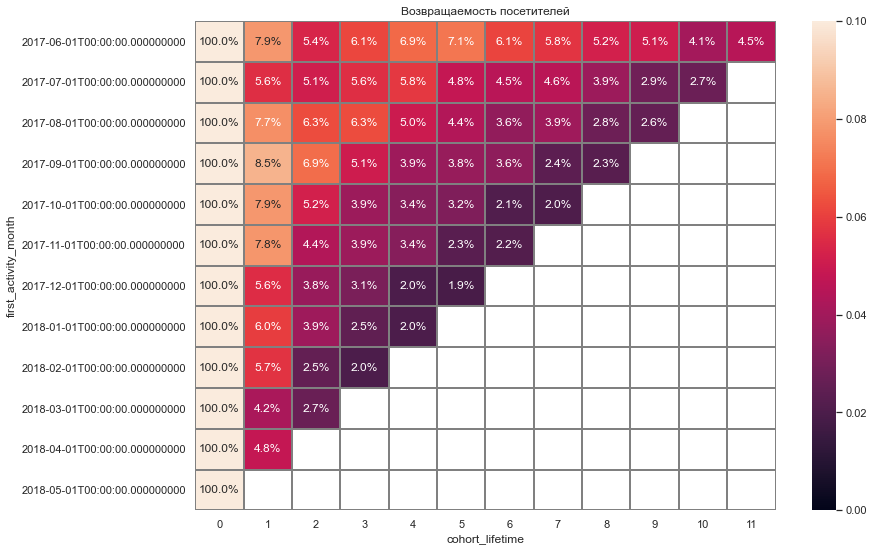

In [197]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Возвращаемость посетителей')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin = 0.00 , vmax = 0.1);

Как мы видим по тепловой карте, пользователи достаточно редко возвращаются на площадку, значит есть над чем работать маркетологам. Чаще всего возвращаются на следующий месяц после первого визита. По тепловой карте можем заметить, что осенние месяца пользуются популярностью, ведь вариантов скрасить досуг становится не так много, а концерты это хорошая возможность провести время. 

### Продажи

<a id="7"></a>Теперь определим - Когда люди начинают покупать?
Для этого сгруппируем таблицы visits и orders по первому посещению и первой покупке

In [198]:
first_visits = pd.DataFrame(visits.groupby('uid').agg({'start_ts': 'min'}))
first_buy = pd.DataFrame(orders.groupby('uid').agg({'buy_ts': 'min'}))
time_when_buy = first_visits.merge(first_buy, on = 'uid')

Теперь получим столбец со временем от визита до первой покупки

In [199]:
time_when_buy['when_buy'] = time_when_buy['buy_ts'] - time_when_buy['start_ts']

Посмотрим на распределение, чтобы определить, когда люди начинают покупать

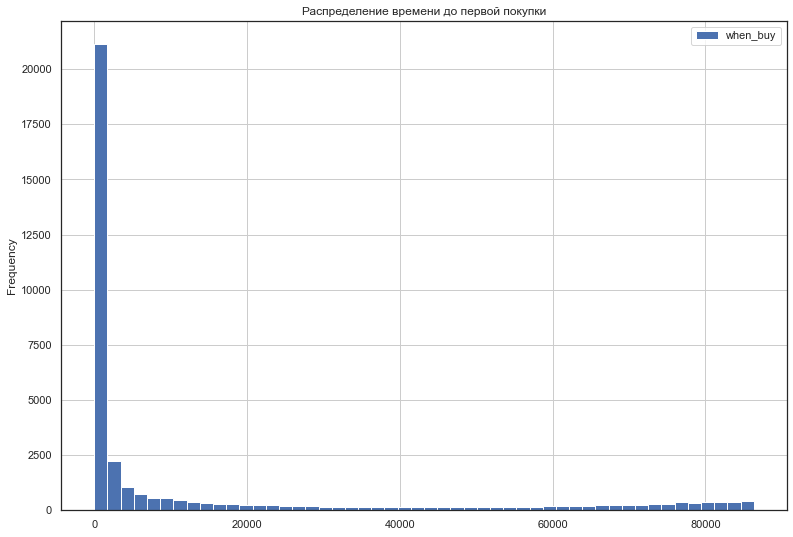

In [200]:
time_when_buy['when_buy'].dt.seconds.plot(bins = 50, kind = 'hist', legend = True, grid = True, title ='Распределение времени до первой покупки', figsize=(13, 9))

Считаю, что целесообразно будет определить время до покупки через Медиану. Интересно, что распределение к концу графика начинает снова увеличиться. Сложно сказать, c чем это может быть связано - может люди мониторят цены на концерты заранее, и только спустя длительное время совершают покупки. 

In [201]:
print('Покупка происходит через:', time_when_buy['when_buy'].median())

Покупка происходит через: 0 days 00:16:00


Мы установили, что в среднем пользователи совершают первую покупку через 16 минут. 

In [202]:
orders['month_to_buy'] = orders['buy_ts'].astype('datetime64[M]')

Посмотрим сколько покупок совершают в среднем <a id="8"></a>

In [203]:
count_orders = orders.groupby('month_to_buy').agg({'uid': 'nunique'}).reset_index()
print('В среднем пользователи покупают: {}'.format(count_orders.uid.mean()))

В среднем пользователи покупают: 3155.3076923076924


Получается, что показатель покупок среди уникальных пользователей составляет примерно 20-25% от общего количества уникальных пользователей в когортах.



Теперь определим месяц активности пользователя

In [204]:
first_activity_date = orders.groupby('uid')['buy_ts'].min()
first_activity_date.name = 'first_activity_date'
orders = orders.merge(first_activity_date, on = 'uid')

In [205]:
orders['first_month'] = orders['first_activity_date'].astype('datetime64[M]')
orders['start_month'] = orders['buy_ts'].astype('datetime64[M]')

Определим Lifetime

In [206]:
orders['lifetime'] = (((orders['start_month'] - orders['first_month'])) / np.timedelta64(1,'M')).round().astype('int')
cohorts = orders.groupby(['first_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()

In [207]:
cohorts.head(10)

,first_month,lifetime,uid
0,2017-06-01,0,2023
1,2017-06-01,1,61
2,2017-06-01,2,50
3,2017-06-01,3,54
4,2017-06-01,4,88
5,2017-06-01,5,67
6,2017-06-01,6,62
7,2017-06-01,7,47
8,2017-06-01,8,58
9,2017-06-01,9,45


<a id="8"></a>Для нахождения Retention Rate, требуется сначала получить число пользователей, изначально бывших в когорте, и потом поделить число пользователей в каждую следующую неделю.
Найдём исходное количество пользователей в когорте. 

In [208]:
initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [209]:
initial_users_count.head(10)

,first_month,cohort_users
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


In [210]:
cohorts = cohorts.merge(initial_users_count, on = 'first_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

In [211]:
retention_pivot = cohorts.pivot_table(index='first_month',columns='lifetime',values='retention',aggfunc='sum')

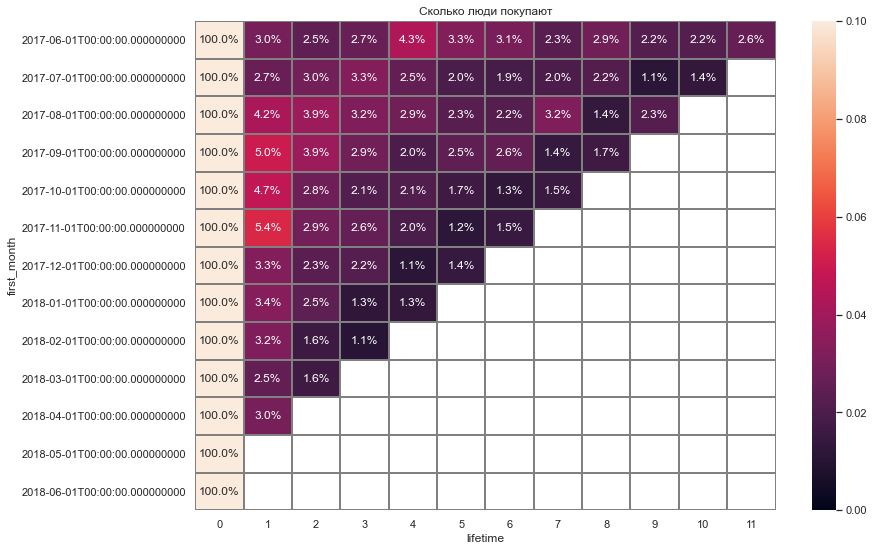

In [212]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Сколько люди покупают')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin = 0.00 , vmax = 0.1);

Как мы можем заметить из графика, очень мало людей совершают повторные покупки. В осенние месяцы новые пользователи активнее больеш всего. Как уже и было сказано выше, осень - самое лучшее время для совершения повторных покупок. Получается, что в среднем пользователи делают по одной покупке.

<a id="9"></a>Посмотрим на средний чек и его динамику из месяца в месяц

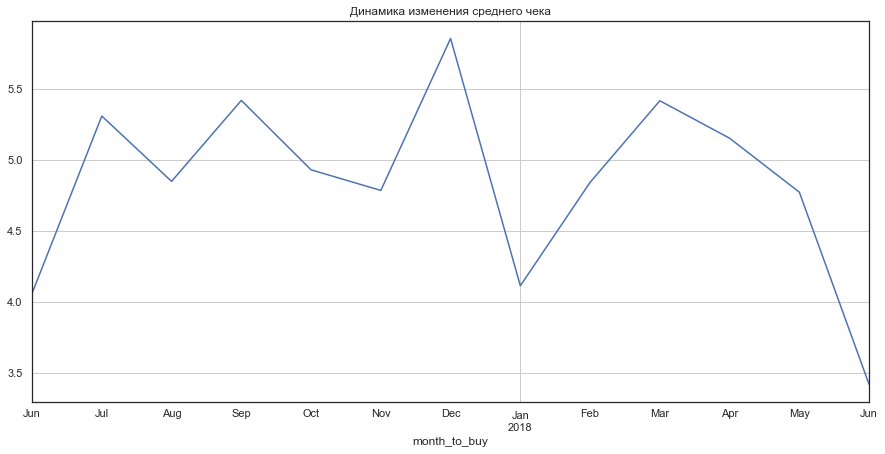

In [213]:
orders.groupby('month_to_buy')['revenue'].mean().plot(figsize=(15,7), grid = True, title = 'Динамика изменения среднего чека')

Здесь мы можем наблюдать, что самый пик по среднему чеку это Осень, декабрь и весна. Как раз в этом вреся люди больше всего готовы ходить на концерты и в театр. Январь, во всех отношениях месяц не особо прибыльный, поскольку очень много праздников.

In [214]:
mean_check = orders['revenue'].mean()

In [215]:
print('Средний чек равен:', (mean_check))

Средний чек равен: 4.999646930476922


Определеим сколько денег приносят пользователи <a id="10"></a>

In [216]:
orders.head(10)

,buy_ts,revenue,uid,month_to_buy,first_activity_date,first_month,start_month,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01,0
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,2017-06-01 08:43:00,2017-06-01,2017-06-01,0
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01 08:54:00,2017-06-01,2017-06-01,0
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-01,2017-06-01 08:54:00,2017-06-01,2017-06-01,0
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01 09:22:00,2017-06-01,2017-06-01,0
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01,2017-06-01 09:22:00,2017-06-01,2017-06-01,0


In [217]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

Получим месяц первой покупки каждого покупателя:

In [218]:
first_order_month = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_order_month.columns = ['uid', 'first_order_month']
first_order_month.head(10)

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
5,3077748354309989,2018-03-01
6,3605148382144603,2017-09-01
7,3753586865891862,2018-03-01
8,4808417689019433,2018-01-01
9,4992223027560440,2018-04-01


Теперь получим количество новых покупателей по каждому месяцу.

In [219]:
cohort_sizes = first_order_month.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

Для каждого пользователя очень важно получить дату первой покупки

In [220]:
cohort_sizes.head(10)

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [221]:
orders_new = pd.merge(orders,first_order_month, on='uid')
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head(10)

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
5,2017-06-01,2017-11-01,1487.92
6,2017-06-01,2017-12-01,1922.74
7,2017-06-01,2018-01-01,1176.56
8,2017-06-01,2018-02-01,1119.15
9,2017-06-01,2018-03-01,1225.51


Прибавим к таблице данные количества людей первый раз совершивших покупку в каждый месяц.

In [222]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head(10)

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
5,2017-06-01,2023,2017-11-01,1487.92
6,2017-06-01,2023,2017-12-01,1922.74
7,2017-06-01,2023,2018-01-01,1176.56
8,2017-06-01,2023,2018-02-01,1119.15
9,2017-06-01,2023,2018-03-01,1225.51


In [223]:
margin_rate = 1 #поскольку мы ничего не знаем о маржинальности, то возьмем 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
print(report.head())

  first_order_month  n_buyers order_month  revenue       gp  age       ltv
0        2017-06-01      2023  2017-06-01  9557.49  9557.49    0  4.724414
1        2017-06-01      2023  2017-07-01   981.82   981.82    1  0.485329
2        2017-06-01      2023  2017-08-01   885.34   885.34    2  0.437637
3        2017-06-01      2023  2017-09-01  1931.30  1931.30    3  0.954671
4        2017-06-01      2023  2017-10-01  2068.58  2068.58    4  1.022531


Посчитаем LTV и построим срез для 6 месяцев, так как это наиболее оптимальный период в данной выборке, для формирования каких-либо выводов.

In [224]:
report_six_month = report[(report['age'] <= 6)&(report['first_order_month'] <= '2017-12-31')]


In [225]:
output = report_six_month .pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round()


Построим тепловую карту для LTV

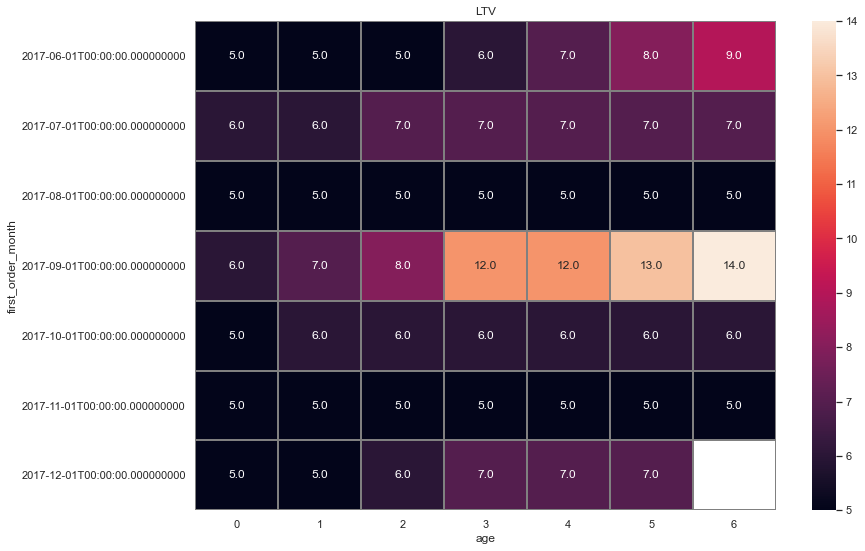

In [226]:
#тепловая карта
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

В результате мы имеем, что больше всего нам принесла июньская сентябрьская когорта.

Для наглядности посчитаем итоговый LTV первой когорты. Суммируем их за 6 месяцев.


In [227]:
ltv_201706 = output.loc['2017-06-01'].sum()
print(ltv_201706)

9.0


В среднем каждый покупатель из первой когорты принес по 9.0 выручки за 6 месяцев.

<a id="11"></a>Определим - сколько денег потратили(Всего / на каждый источник / по времени)

In [228]:
print('Всего было потрачено на маркетинг за все время {} руб'.format(costs['costs'].sum()))

Всего было потрачено на маркетинг за все время 329131.62 руб


In [229]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')

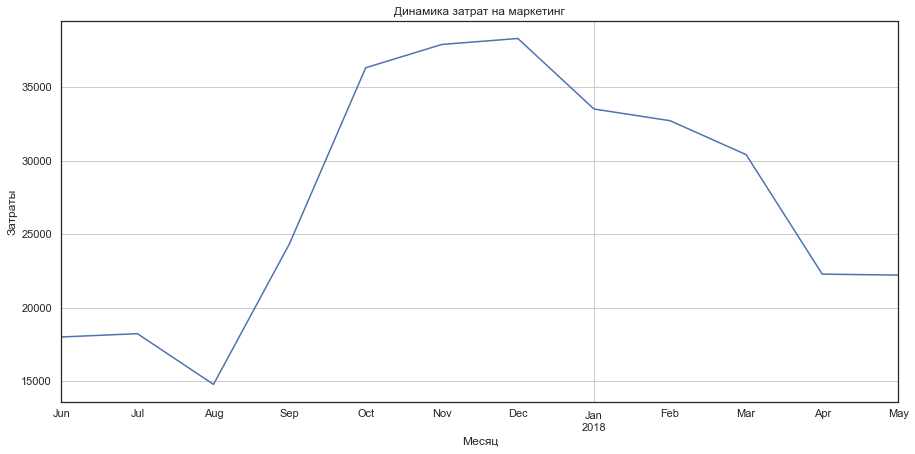

In [230]:
costs.groupby('cost_month')['costs'].sum().plot(figsize=(15,7), grid = True, title = 'Динамика затрат на маркетинг')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()

In [231]:
source = costs.groupby('source_id')['costs'].sum()

In [232]:
source.head(30)

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

[Text(0, 0.5, 'Сумма затрат'),
 Text(0.5, 0, 'Номер источника'),
 Text(0.5, 1.0, 'Сколько маркетинг отратил на каждый источник')]

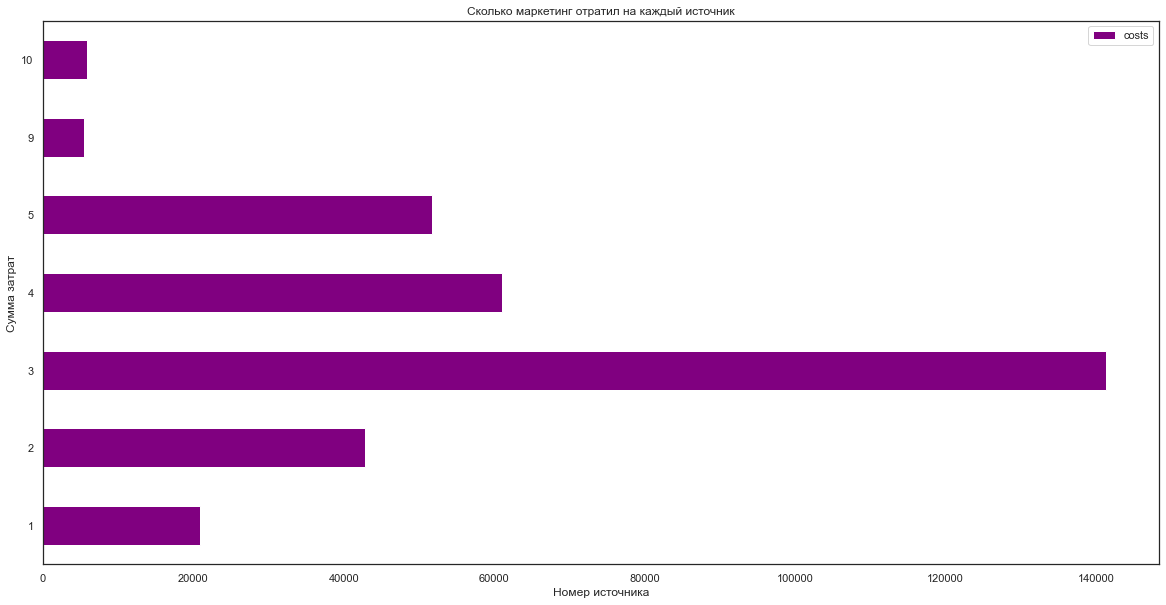

In [233]:
source.plot.barh(legend=True, facecolor='purple',align='center',figsize=(20,10)).set(title='Сколько маркетинг отратил на каждый источник', xlabel="Номер источника", ylabel="Сумма затрат")

Как мы видимо по графику, огромный упор был сделан на истончик под номером 3.

In [234]:
users_in_source = costs.groupby('source_id').agg({'costs': 'sum'})

In [235]:
users_in_source.head(10)

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Для подсчета SAS и ROI добьемся того, что в visits каждое uid встречалось только 1 раз.

In [236]:
uid_unique = pd.DataFrame(visits.groupby('uid').agg({'start_ts': 'min'}))
qq = visits.merge(uid_unique, on = ['uid', 'start_ts'])

Объединим orders c qq 

In [237]:
for_sas = orders.merge(qq, on = 'uid')

In [238]:
for_sas.head(10)

,buy_ts,revenue,uid,month_to_buy,first_activity_date,first_month,start_month,lifetime,order_month,device,end_ts,source_id,start_ts,session_year,session_month,session_week,session_date,session_duration_sec
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,2017-06-01,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,2017,6,22,2017-06-01,120
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2017-06-01,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,660
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2017-06-01,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,2017,6,22,2017-06-01,540
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2017-06-01,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,2017,6,22,2017-06-01,1140
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,2017-06-01,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,2017,6,22,2017-06-01,1680
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,2017-06-01 08:43:00,2017-06-01,2017-06-01,0,2017-06-01,desktop,2017-06-01 08:46:00,3,2017-06-01 08:43:00,2017,6,22,2017-06-01,180
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01 08:54:00,2017-06-01,2017-06-01,0,2017-06-01,desktop,2017-06-01 09:12:00,5,2017-06-01 08:51:00,2017,6,22,2017-06-01,1260
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-01,2017-06-01 08:54:00,2017-06-01,2017-06-01,0,2017-06-01,desktop,2017-06-01 09:12:00,5,2017-06-01 08:51:00,2017,6,22,2017-06-01,1260
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01 09:22:00,2017-06-01,2017-06-01,0,2017-06-01,desktop,2017-06-01 09:22:19,1,2017-06-01 09:22:00,2017,6,22,2017-06-01,19
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01,2017-06-01 09:22:00,2017-06-01,2017-06-01,0,2017-06-01,desktop,2017-06-01 09:22:19,1,2017-06-01 09:22:00,2017,6,22,2017-06-01,19


In [239]:
new_sas = for_sas.groupby('source_id').agg({'uid': 'nunique', 'revenue': 'sum'}).reset_index()
new_sas.columns = ['source_id', 'n_buyers', 'revenue']

In [240]:
new_sas.head(10)

,source_id,n_buyers,revenue
0,1,2899,31090.55
1,2,3506,46923.61
2,3,10473,54511.24
3,4,10296,56696.83
4,5,6931,52624.02
5,7,1,1.22
6,9,1088,5759.40
7,10,1329,4450.33


In [241]:
total_sas = users_in_source.merge(new_sas, on = 'source_id')

In [242]:
total_sas['sas'] = total_sas['costs'] / total_sas['n_buyers']
total_sas['gp'] = total_sas['revenue']

In [243]:
total_sas.head(10)

,source_id,costs,n_buyers,revenue,sas,gp
0,1,20833.27,2899,31090.55,7.186364,31090.55
1,2,42806.04,3506,46923.61,12.209367,46923.61
2,3,141321.63,10473,54511.24,13.493901,54511.24
3,4,61073.60,10296,56696.83,5.931779,56696.83
4,5,51757.10,6931,52624.02,7.467479,52624.02
5,9,5517.49,1088,5759.40,5.071222,5759.40
6,10,5822.49,1329,4450.33,4.381106,4450.33


Построим граффик SAS по разным источникам на клиента.

[Text(0, 0.5, 'Сумма затрат'),
 Text(0.5, 0, 'Номер источника'),
 Text(0.5, 1.0, 'Затраты на привлечение клиента по источникам')]

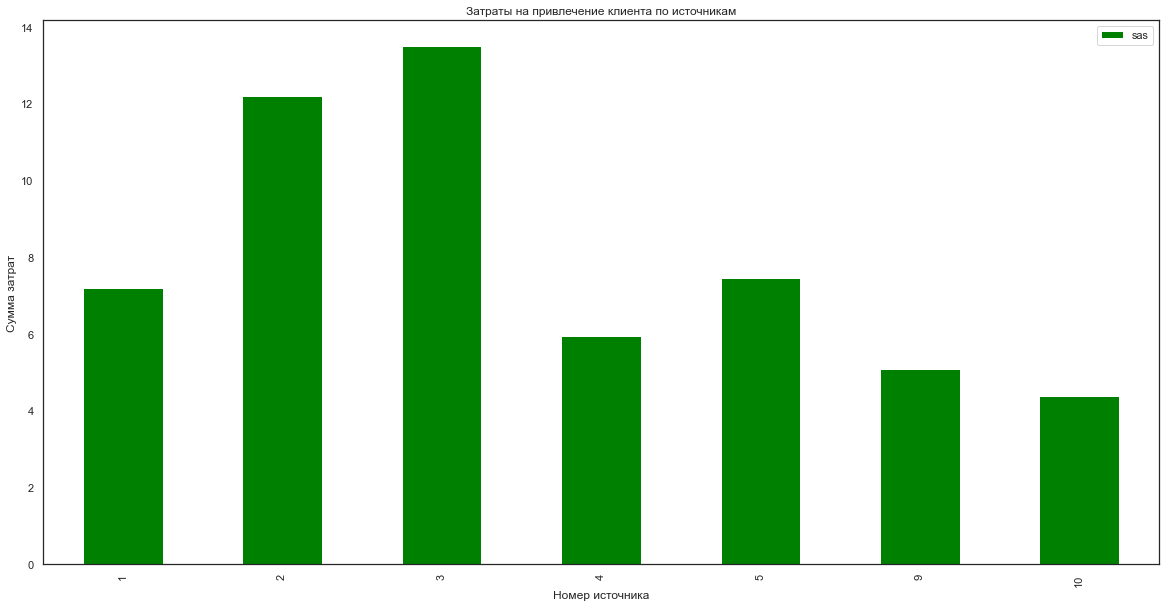

In [244]:
total_sas.pivot_table(index= 'source_id', values = 'sas', aggfunc = 'max').plot.bar(legend=True, facecolor='green',align='center',figsize=(20,10)).set(title='Затраты на привлечение клиента по источникам', xlabel="Номер источника", ylabel="Сумма затрат")

In [245]:
print('Итоговые затраты на привлечения клиентов по всем источникам:', total_sas['sas'].mean())

Итоговые затраты на привлечения клиентов по всем источникам: 7.963031402494954


Сколько денег потратили на 1 клиента по источникам <a id="12"></a>

In [246]:
costs_new = costs.groupby(['source_id', 'cost_month']).agg({'costs': 'sum'}).reset_index()
costs_new.columns = ('source_id','order_month', 'costs')
new_order_users_source = for_sas.merge(costs_new, on=['order_month', 'source_id'])

In [247]:
order_users_source = for_sas.pivot_table(index = ('order_month', 'source_id'),
                                               values='uid',
                                               aggfunc = pd.Series.nunique).reset_index()
order_users_source.columns = ('order_month', 'source_id', 'n_users')

In [248]:
order_users_source.head(13)

,order_month,source_id,n_users
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
5,2017-06-01,9,68
6,2017-06-01,10,95
7,2017-07-01,1,176
8,2017-07-01,2,216
9,2017-07-01,3,525


In [249]:
order_users_source_new = order_users_source.merge(costs_new, on=['order_month', 'source_id'])
order_users_source_new['sas'] = order_users_source_new ['costs'] / order_users_source_new ['n_users']

In [250]:
order_users_source_new.head(20)

,order_month,source_id,n_users,costs,sas
0,2017-06-01,1,190,1125.61,5.924263
1,2017-06-01,2,235,2427.38,10.329277
2,2017-06-01,3,638,7731.65,12.118574
3,2017-06-01,4,413,3514.80,8.510412
4,2017-06-01,5,384,2616.12,6.812813
5,2017-06-01,9,68,285.22,4.194412
6,2017-06-01,10,95,314.22,3.307579
7,2017-07-01,1,176,1072.88,6.095909
8,2017-07-01,2,216,2333.11,10.801435
9,2017-07-01,3,525,7674.37,14.617848


Посмотрим как менялся показатель потраченных на рекламу денег к количеству привлеченных клиентов по разным источникам со временем.

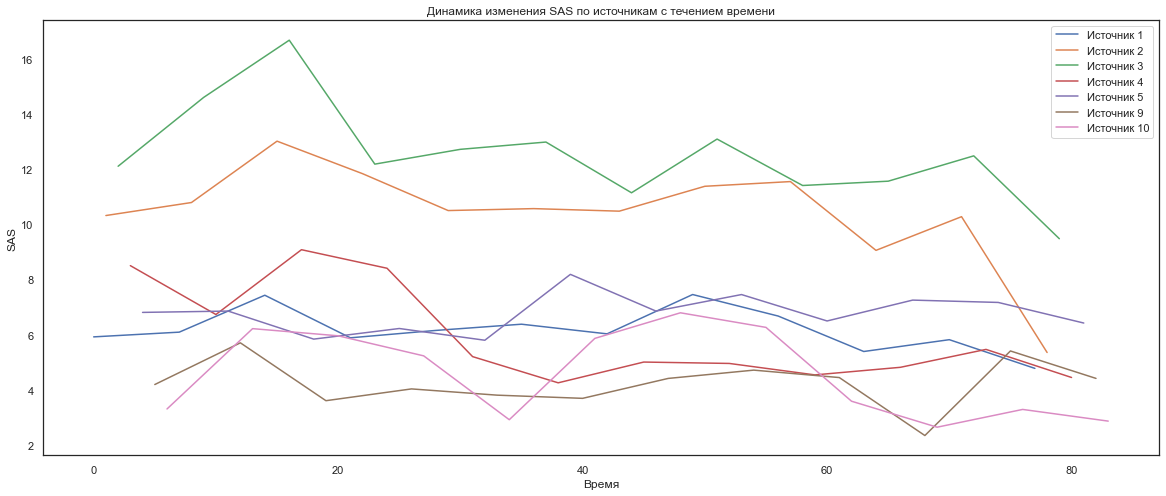

In [251]:
plt.figure(figsize = (20,8))
#x= order_users_source_new['order_month']
plt.plot(order_users_source_new.query('source_id == "1"')['sas'])
plt.plot(order_users_source_new.query('source_id == "2"')['sas'])
plt.plot(order_users_source_new.query('source_id == "3"')['sas'])
plt.plot(order_users_source_new.query('source_id == "4"')['sas'])
plt.plot(order_users_source_new.query('source_id == "5"')['sas'])
plt.plot(order_users_source_new.query('source_id == "9"')['sas'])
plt.plot(order_users_source_new.query('source_id == "10"')['sas'])
plt.legend(['Источник 1', 'Источник 2', 'Источник 3', 'Источник 4', 'Источник 5', 'Источник 9', 'Источник 10'])
plt.title('Динамика изменения SAS по источникам с течением времени')
plt.xlabel('Время')
plt.ylabel('SAS')
plt.show()

Как мы уже смогли сделать вывод ранее - 2 и 3 источники самые затратрые

Посмотрим на показатели LTV  и  ROI отдельно по каждому источнику, чтобы определить окупаемость рекламы.

In [252]:
for_sas['order_month'] = for_sas['buy_ts'].astype('datetime64[M]')

In [253]:
visits_new.head(10)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visit_date,activity_month,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-05-01,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09 20:05:00,2018-03-01,2018-03-01,0
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01,0
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017,10,43,2017-10-27,2520,2017-09-03 21:35:00,2017-10-01,2017-09-01,1
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017,9,36,2017-09-04,1140,2017-09-03 21:35:00,2017-09-01,2017-09-01,0
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017,10,43,2017-10-27,480,2017-09-03 21:35:00,2017-10-01,2017-09-01,1


In [254]:
orders.head(10)

,buy_ts,revenue,uid,month_to_buy,first_activity_date,first_month,start_month,lifetime,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01,0,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,2017-06-01 08:43:00,2017-06-01,2017-06-01,0,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01 08:54:00,2017-06-01,2017-06-01,0,2017-06-01
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-01,2017-06-01 08:54:00,2017-06-01,2017-06-01,0,2017-06-01
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01 09:22:00,2017-06-01,2017-06-01,0,2017-06-01
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01,2017-06-01 09:22:00,2017-06-01,2017-06-01,0,2017-06-01


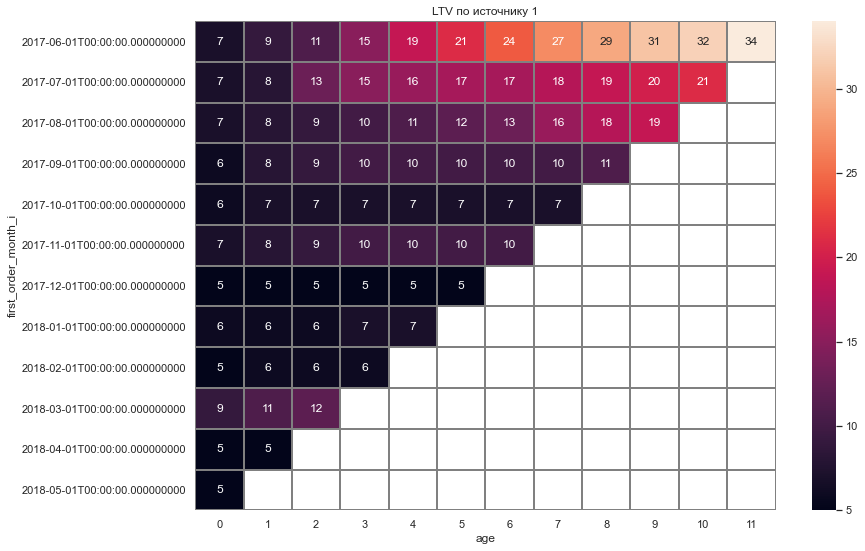

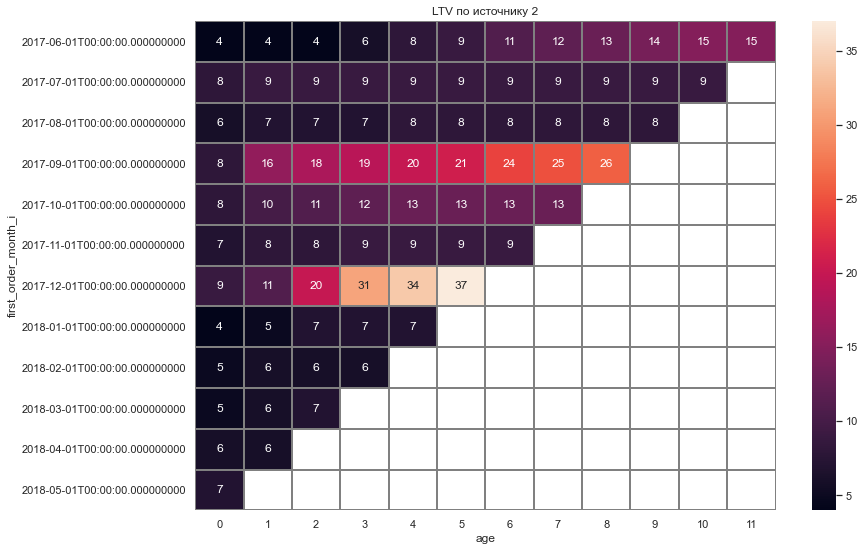

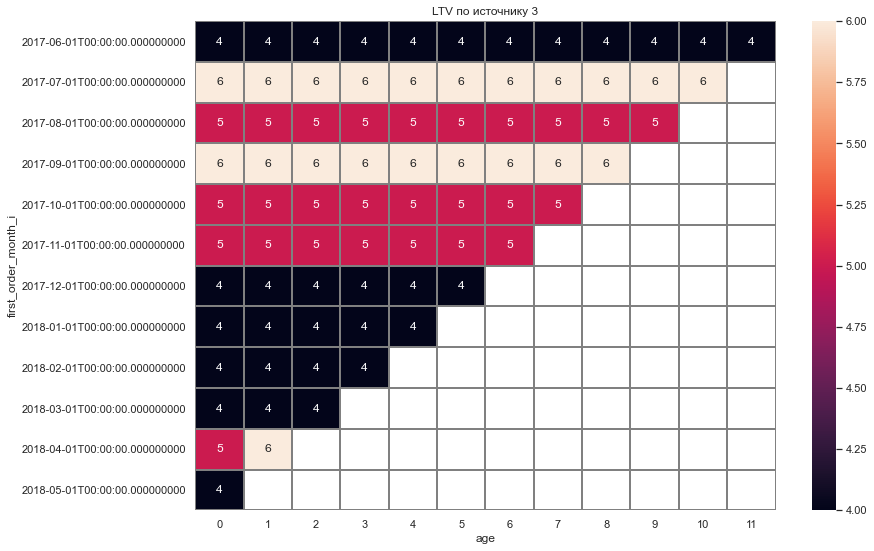

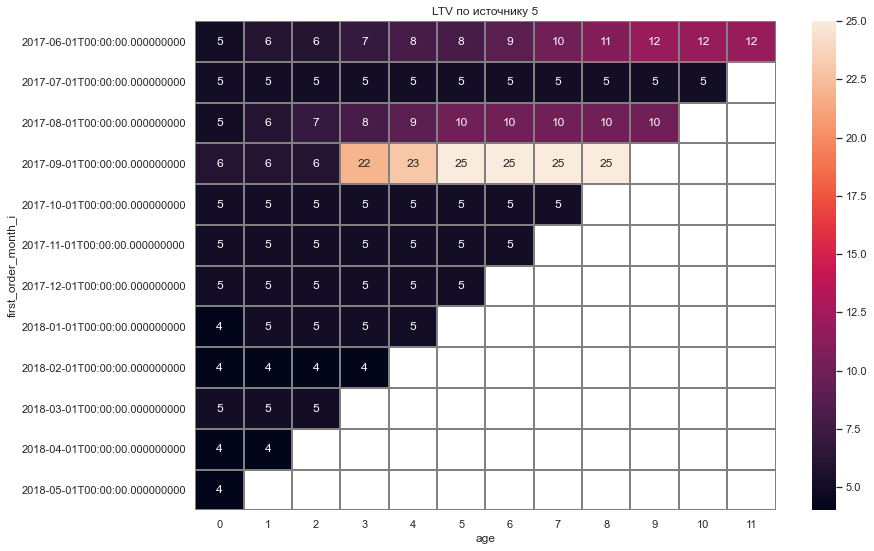

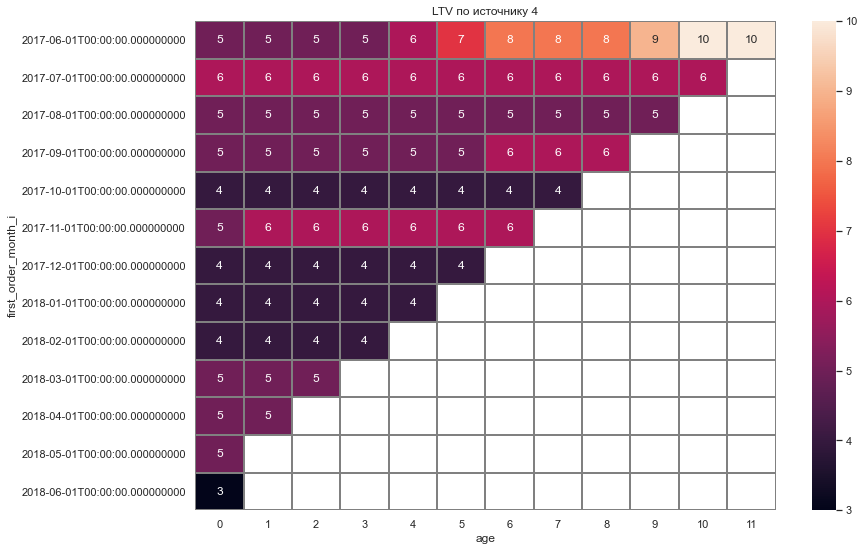

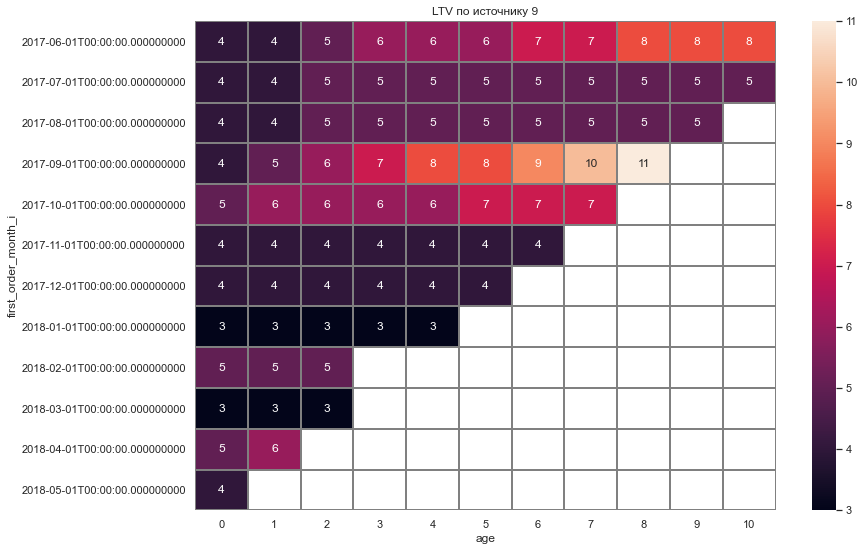

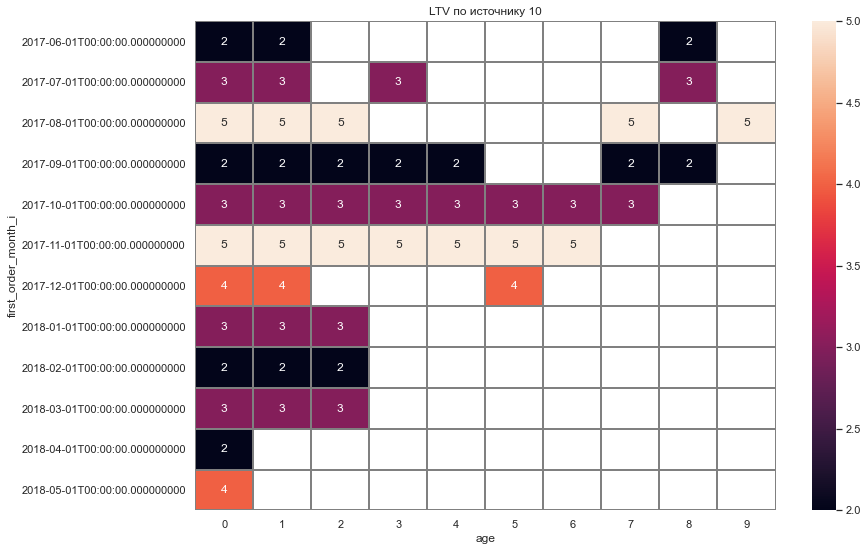

In [255]:
for i in for_sas['source_id'].unique():
    if i!=7:
        orders_new = for_sas.loc[for_sas['source_id'] == i]
        first_order_month_i = orders_new.groupby('uid')['order_month'].min().reset_index()
        first_order_month_i.columns = ['uid', 'first_order_month_i']
        orders_new_ltv = orders_new.merge(first_order_month_i, on = 'uid')
        cohorts_size_i = first_order_month_i.groupby('first_order_month_i')['uid'].nunique().reset_index()
        cohorts_size_i.columns = ['first_order_month_i', 'i_buyers']
        cohorts_i = orders_new_ltv.groupby(['first_order_month_i', 'order_month'])['revenue'].sum().reset_index()
        report_i = cohorts_i.merge(cohorts_size_i, on = 'first_order_month_i')
        report_i['age'] = (report_i['order_month'] - report_i['first_order_month_i']) / np.timedelta64(1, 'M')
        report_i['age'] = report_i['age'].round().astype('int')
        report_i['ltv'] = report_i['revenue'] / report_i['i_buyers']
        output_i = report_i.pivot_table(index = 'first_order_month_i',
                                       columns = 'age',
                                       values = 'ltv',
                                       aggfunc = 'mean').round()
        sns.set(style='white')
        plt.figure(figsize=(13, 9))
        plt.title('LTV по источнику {}'.format(i))
        sns.heatmap(output_i.cumsum(axis=1).round(2), annot=True, fmt='.0f', linewidths=1, linecolor='gray')



Результаты удивляют - 1 и 2 источники больше всего приносят прибыль в перспективе.

Теперь посмотрим отдельон на ROI <a id="13"></a>

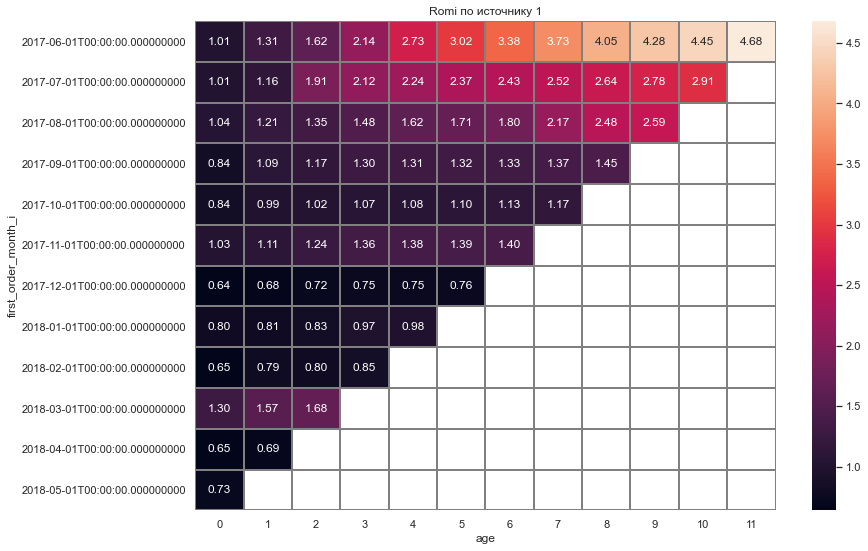

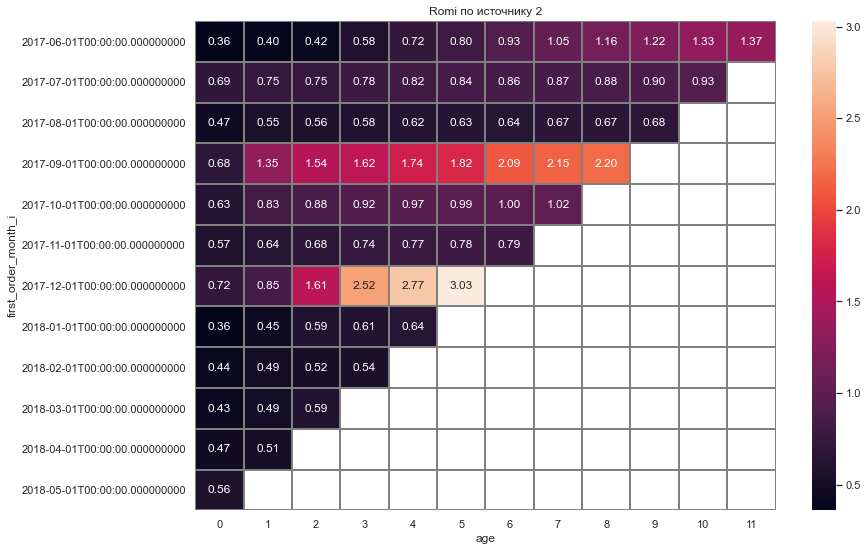

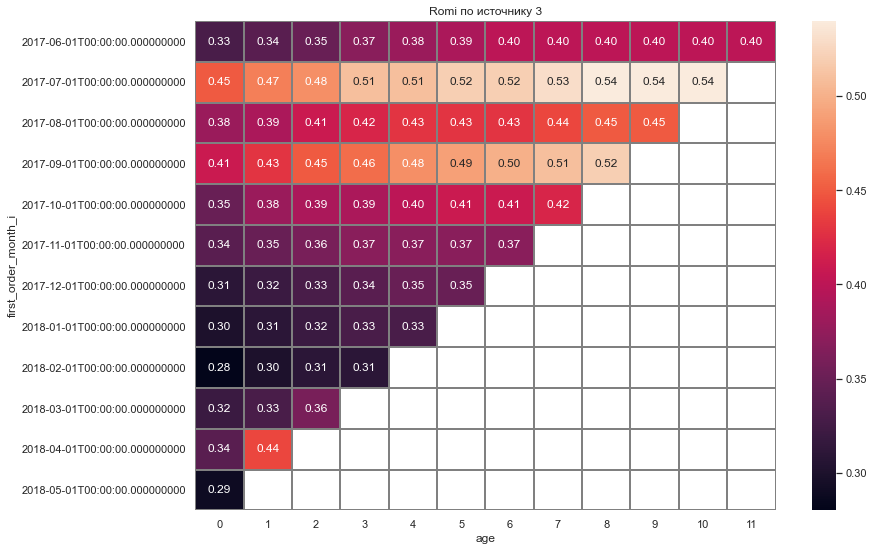

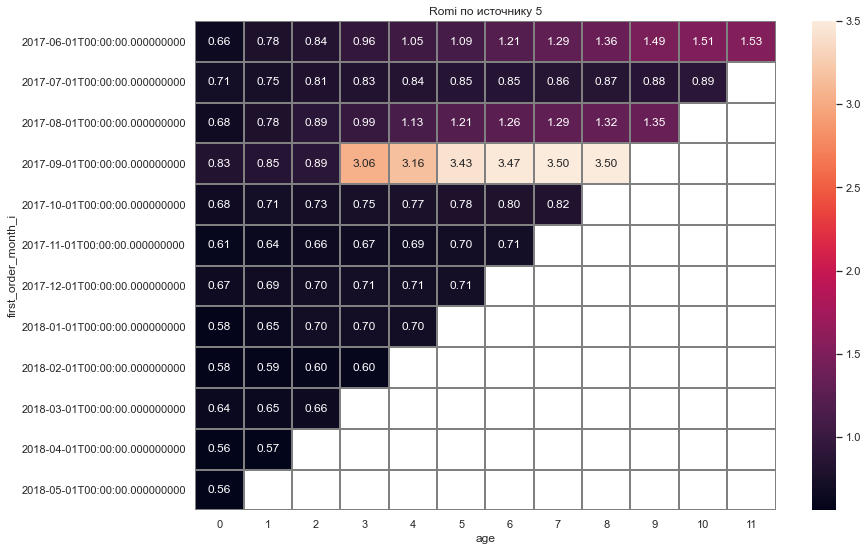

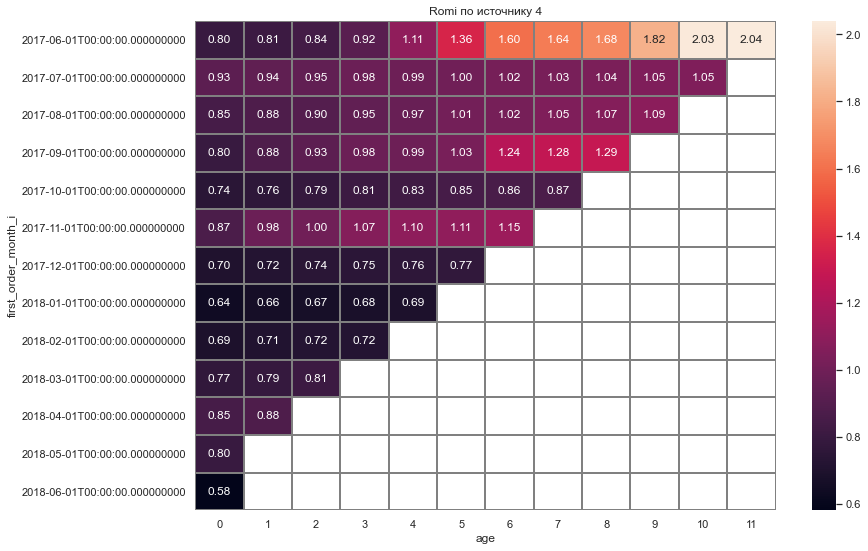

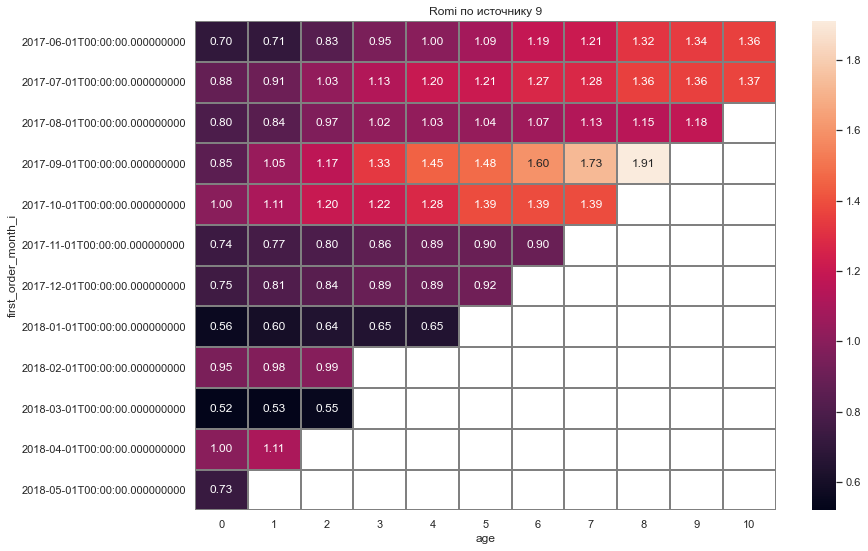

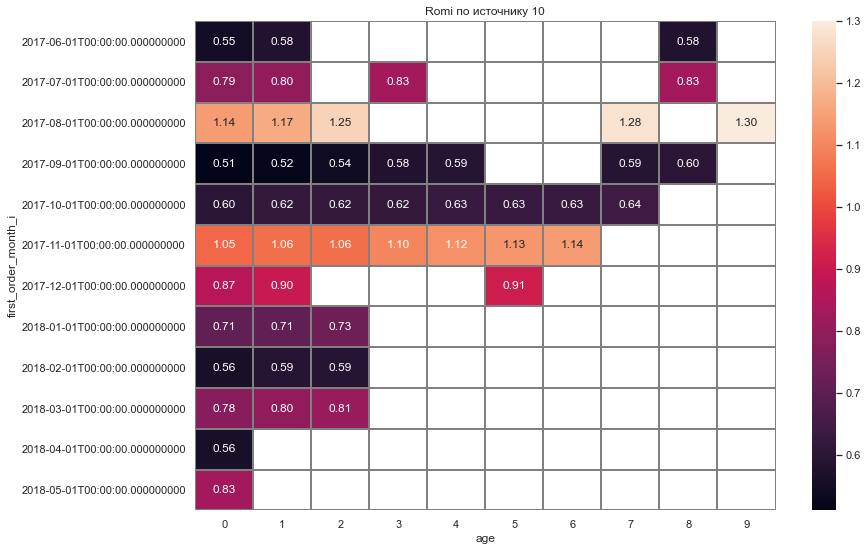

In [256]:
for i in for_sas['source_id'].unique():
    if i!=7:
        orders_new = for_sas.loc[for_sas['source_id'] == i]
        first_order_month_i = orders_new.groupby('uid')['order_month'].min().reset_index()
        first_order_month_i.columns = ['uid', 'first_order_month_i']
        orders_new_ltv = orders_new.merge(first_order_month_i, on = 'uid')
        cohorts_size_i = first_order_month_i.groupby('first_order_month_i')['uid'].nunique().reset_index()
        cohorts_size_i.columns = ['first_order_month_i', 'i_buyers']
        cohorts_i = orders_new_ltv.groupby(['first_order_month_i', 'order_month'])['revenue'].sum().reset_index()
        report_i = cohorts_i.merge(cohorts_size_i, on = 'first_order_month_i')
        report_i['age'] = (report_i['order_month'] - report_i['first_order_month_i']) / np.timedelta64(1, 'M')
        report_i['age'] = report_i['age'].round().astype('int')
        report_i['ltv'] = report_i['revenue'] / report_i['i_buyers']
        source_sas_i = total_sas[total_sas['source_id'] == i].reset_index()['sas'][0]
        report_i['romi'] = report_i['ltv'] / source_sas_i
        output_romi = report_i.pivot_table(index = 'first_order_month_i',
                                    columns = 'age',
                                    values = 'romi',
                                    aggfunc = 'mean').round(2)
        sns.set(style='white')
        plt.figure(figsize=(13, 9))
        plt.title('Romi по источнику {}'.format(i))
        sns.heatmap(output_romi.cumsum(axis=1).round(2), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
    
    #for row in total_sas['sas'].unique():
        #rows = for_sas.loc[for_sas['source_id'] == row]
   # report_i['romi'] = report_i['ltv'] / total_sas['sas'][i] 

Как оказалось - первый источник окупается быстрее всего, следовательно имеет смысле его развивать далее. А вот здесь самый денежный источник 3 даже почти за год не окупается. Результаты анализа говорят нам о том, что необходимо перераспределить приоритеты в рекламной кампании.


## Шаг №4. Итоговый вывод: 

Судя по результатам Анализа - я могу порекомендовать и сточники 1 и 2. Они достаточно быстро окупаются + Источник номер 1 не требует больших финансовых затрат. Да, пользователей при нынешлих тратах было привлечено не так и много с помощью этих источников, по сравнению с другими. Кажется, что если сделать упор на них, то можно быстро и денег заработать и привлечь еще пользователей. Такие выводы сделаны на основе LTV и ROI по всем источникам. Что касается Источника № 3, то он хоть и привлек много покупателей, но этого оказалось не достаточно для окупаемости рекламы даже за год. Считаю, что расходы на рекламу здесь все же стоит снизить, в том же Источнике №3 Росходи на клиента составляет 12, что является самым высоким показателем. Если мы потратим столько же денег на рекламу Источника №1 как на Источник №3, то мы заработаем в 4 раза больше прибыли. Что касается источников 9, 10, 7, то я бы на них и дальше особо не тратился, так как они почти работают в 0. Источник № 4 и № 5 можно особо не трогать, они начинают окупать примерно через 9 месяцев. С точки зрения крупного бизнеса - это не критично.

Еще сформировалось видение, что летом особо не стоит сильно тратить деньги на рекламу, а лучше это делать в начале осени. В это время клиенты чаще всего начинают интересоваться событиями Афиши и больше покупать, поэтому, надо пользоваться моментом. 

Стоит заметить, что пользователи очень редко делают повторые покупки, стоит над этим поработать. Сайт Яндекс.Афиша скорее всего очень понятный и оптимизированный, поскольку покупки на нем совершаются быстро после первого визита. Примерно 25 % уникальных посетителей делает покупки на Яндекс.Афише. Больше всего денег пользователи тратят в Декабре - скорее всего время предновогодних праздников мотивирует людей покупать билеты на концерты в качестве подарка. Осень и Весна тоже выдаются достаточно хорошим уровнем среднего чека в районе 5. 

Есть мнение, что очень важно ориентироваться на показатели LTV, SAS и ROI по источникам отдельно. По крайней мере мы смогли узнать время, через которое они начинают окупаться - а это помогло определить как лучше распределить деньги на рекламу. 